In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn import datasets

from sklearn.metrics.pairwise import euclidean_distances

In [3]:
# blob_a = 1.5 * np.random.rand(10,2)
# blob_a[:, 0] += 4
# blob_b = 1.5 * np.random.rand(10,2)
# blob_b[:, 0] += 10
# blob_c = 1.5 * np.random.rand(30,2)
# blob_c[:, 0] += 5
# blob_c[:, 1] += 5

# data = np.concatenate((blob_a, blob_b, blob_c), axis=0)

data, y = datasets.make_moons(n_samples=100, shuffle=True)
num_points = data.shape[0]


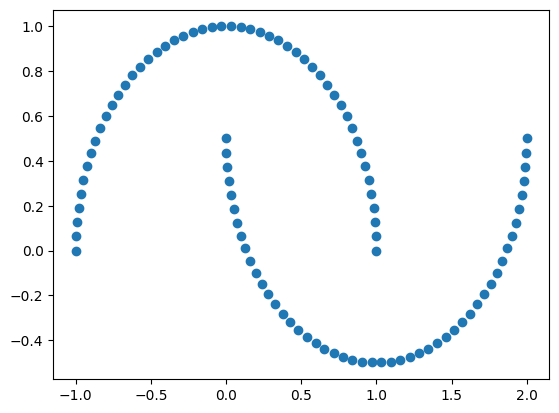

In [9]:
colors = np.array(["#377eb8",
                    "#ff7f00",
                    "#4daf4a",
                    "#f781bf",
                    "#a65628",
                    "#984ea3",
                    "#999999",
                    "#e41a1c",
                    "#dede00"])

plt.scatter(data[:,0], data[:,1])
# plt.xlim([2, 12])
# plt.ylim([0, 10])

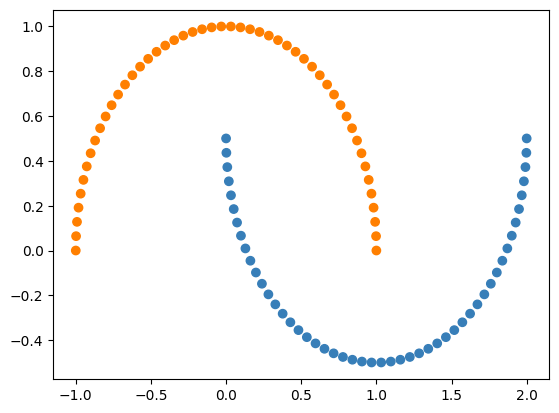

In [10]:
eps = 0.1
n_samples = 3
dbscan = DBSCAN(eps=eps, min_samples=n_samples)
labels_sklearn = dbscan.fit_predict(data)

plt.scatter(data[:,0], data[:,1], color=colors[labels_sklearn])
# plt.xlim([2, 12])
# plt.ylim([0, 10])

In [11]:
labels_sklearn

array([0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1])

In [26]:
core_points = [[] for _ in range(num_points)]
dists = np.zeros((num_points,))
for i in range(num_points):
    distances = euclidean_distances(data, [data[i, :]]).reshape(num_points,)
    nbrs = (distances < eps).nonzero()[0]
    if nbrs.shape[0] < n_samples:
        continue
    for j in range(len(distances)):
        if distances[j] >= eps:
            continue
        if distances[j] > dists[j]:
            dists[j] = distances[j]
            core_points[j] = i

    # nbrs = (distances < eps).nonzero()[0]
    # if nbrs.shape[0] >= n_samples:
    #     for nbr in nbrs:
    #         if core_points[nbr] == -1 or i > core_points[nbr]:
    #             core_points[nbr] = i

print(core_points)

labels = np.arange(num_points)
labels[core_points == -1] = -1
converged = False
num_iterations = 0
while not converged:
    num_iterations += 1
    converged = True
    for i in range(num_points):
        if labels[i] == -1:
            continue
        current_core_idx = core_points[i]
        if labels[i] < labels[current_core_idx]:
            labels[current_core_idx] = labels[i]
            converged = False
        elif labels[i] > labels[current_core_idx]:
            labels[i] = labels[current_core_idx]
            converged = False

print(f"Converged in {num_iterations} iterations")

print(labels)
num_labels = 0
label_map = {}
for l in labels:
    if l not in label_map:
        label_map[l] = num_labels
        num_labels += 1
label_map[-1] = -1
labels = [label_map[l] for l in labels]

print(label_map)

[ 4 86 19 51  0 56 31 45 38 48 56 36 74 46 36 91 62 49 70  2 39 29 37 55
 47 62 63  5 78 21 35  6  4 50 41 30 14 22  8 41 35 34 99 54 72 10 13 24
  9 17 25  3 34 68 43 31 10 15 30 24 68 65 25 26 71 61 89 52 60 92 18 64
 44 32 12 49 82 21 28 13 74 26 60 61 14 75 65  0 46 12  7 15 69 85 93 92
  9 84 27 42]
Converged in 3 iterations
[ 0  1  2  3  0  5  6  5  8  9  5 11 12 13 11 15 16 17 18  2 20 21 22  6
 24 16 26  5 28 21 30  6  0 16 20 30 11 22  8 20 30 20 42 43 44  5 13 24
  9 17 16  3 20 53 43  6  5 15 30 24 53  1 16 26 64  1 12 20 53 69 18 64
 44  0 12 17 53 21 28 13 12 26 53  1 11 17  1  0 13 12  5 15 69 17 17 69
  9 11  5 42]
{0: 0, 1: 1, 2: 2, 3: 3, 5: 4, 6: 5, 8: 6, 9: 7, 11: 8, 12: 9, 13: 10, 15: 11, 16: 12, 17: 13, 18: 14, 20: 15, 21: 16, 22: 17, 24: 18, 26: 19, 28: 20, 30: 21, 42: 22, 43: 23, 44: 24, 53: 25, 64: 26, 69: 27, -1: -1}


In [27]:
seen = set()
i = 2
while i not in seen:
    print(f"{i} -> {core_points[i]}")
    seen.add(i)
    i = core_points[i]

2 -> 19
19 -> 2


In [8]:
plt.scatter(data[:,0], data[:,1], color=colors[labels])
# plt.xlim([2, 12])
# plt.ylim([0, 10])

print(np.bincount(labels_sklearn))
print(np.bincount(labels))

IndexError: index 9 is out of bounds for axis 0 with size 9